In [2]:
import requests
import json
import numpy as np
import pandas as pd

response = requests.get("https://data.ntpc.gov.tw/api/datasets/71CD1490-A2DF-4198-BEF1-318479775E8A/json")
content = response.content
json_tree = json.loads(content)
ndarr = np.array(json_tree)
print("The downloaded data in ndarray format")
print(ndarr)

The downloaded data in ndarray format
[{'sno': '1001', 'sna': '大鵬華城', 'tot': '38', 'sbi': '25', 'sarea': '新店區', 'mday': '20201023111443', 'lat': '24.99116', 'lng': '121.53398', 'ar': '新北市新店區中正路700巷3號', 'sareaen': 'Xindian Dist.', 'snaen': 'Dapeng Community', 'aren': 'No. 3, Lane 700 Chung Cheng Road, Xindian District', 'bemp': '13', 'act': '1'}
 {'sno': '1002', 'sna': '汐止火車站', 'tot': '56', 'sbi': '39', 'sarea': '汐止區', 'mday': '20201023111427', 'lat': '25.068914', 'lng': '121.662748', 'ar': '南昌街/新昌路口(西側廣場)', 'sareaen': 'Xizhi Dist.', 'snaen': 'Xizhi Railway Station', 'aren': 'Nanchang St./Xinchang Rd.', 'bemp': '17', 'act': '1'}
 {'sno': '1003', 'sna': '汐止區公所', 'tot': '46', 'sbi': '15', 'sarea': '汐止區', 'mday': '20201023111424', 'lat': '25.064162', 'lng': '121.658301', 'ar': '新台五路一段/仁愛路口(新台五路側汐止地政事務所前機車停車場)', 'sareaen': 'Xizhi Dist.', 'snaen': 'Xizhi Dist. Office', 'aren': 'Sec. 1, Xintai 5th Rd./Ren’ai Rd.', 'bemp': '28', 'act': '1'}
 {'sno': '1004', 'sna': '國泰綜合醫院', 'tot': '56', 'sbi':

In [6]:
ID = [item['sno'] for item in json_tree]
NAME = [item['sna'] for item in json_tree]
TOTAL = [item['tot'] for item in json_tree]
SBI = [item['sbi'] for item in json_tree]
START = [item['sarea'] for item in json_tree]
DAY = [item['mday'] for item in json_tree]
LATE = [item['lat'] for item in json_tree]
ING = [item['lng'] for item in json_tree]
ARMD = [item['ar'] for item in json_tree]
STATION = [item['sareaen'] for item in json_tree]
SNAEN = [item['snaen'] for item in json_tree]
AREN = [item['aren'] for item in json_tree]
BEMP = [item['bemp'] for item in json_tree]
ACTION = [item['act'] for item in json_tree]
Info = zip(ID, NAME, TOTAL, SBI,START,DAY,LATE,ING, ARMD,STATION,SNAEN,AREN,BEMP,ACTION)
Taiwan_Bike = pd.DataFrame(list(Info), columns=['Id', 'Name','Total','Sbi','Strat','Day','Late','Ing','Armd',
                                           'Terminal','Snaen','Arean','Bemp','Action'])

print("The downloaded data in dataframe format")
Taiwan_Bike.tail()

The downloaded data in dataframe format


,Id,Name,Total,Sbi,Strat,Day,Late,Ing,Armd,Terminal,Snaen,Arean,Bemp,Action
15,1016,福營行政中心,42,13,新莊區,20201023111430,25.0241250,121.423870,四維路17號-20號,Xinzhuang Dist.,Fuying Administration Center,"No.17, Siwei Rd./No.20, Siwei Rd.",29,1
16,1017,西盛公園,36,16,新莊區,20201023111435,25.017113,121.428048,新莊區西盛街/西盛街201巷,Xinzhuang Dist.,Xisheng Park,"Xisheng St./Ln. 201, Xisheng St.",20,1
17,1018,忠誠里(北新路2段97巷),40,22,新店區,20201023111445,24.974272,121.542779,北新路二段/北新路二段97巷,Xindian Dist.,"Zhongcheng Village (Ln. 97, Sec. 2, Beixin Rd)","Sec. 2, Beixin Rd./Ln. 97, Sec. 2, Beixin Rd.",16,1
18,1019,仁愛廣場,50,12,蘆洲區,20201023111438,25.090565,121.471621,民權路139號旁,Luzhou Dist.,Renai Square,"No.139, Minquan Rd.",38,1
19,1020,重陽國小,42,9,三重區,20201023111431,25.066245,121.484337,中正北路/三民街175巷,Sanchong Dist.,Chong Yang Elementary School,"Zhongzheng N. Rd./Ln. 175, Sanmin St.",27,1


In [7]:
import numpy as np
lrat = []
for bike_rent_records in json_tree:
    LRATIO = float(bike_rent_records["sbi"]) / float(bike_rent_records["tot"]) * 100
    lrat.append(round(LRATIO,3))
y=lrat
#slice dataframe colomn of 3
xstr=Taiwan_Bike.iloc[:,2]
#convert a string array to a float array
x = xstr.astype(np.float)
data = np.vstack((x,y)).T
sdata = data[data[:,0].argsort()]
#sdata = data[np.argsort(data[:, 0])]
print("Before sorted")
print(data.T)
print("x has been sorted")
print(sdata.T)
#plt.scatter(x,y)

Before sorted
[[38.    56.    46.    56.    40.    94.    34.    40.    68.    34.
  48.    52.    46.    52.    40.    42.    36.    40.    50.    42.   ]
 [65.789 69.643 32.609 58.929 57.5   35.106 23.529 27.5   20.588 26.471
  64.583 21.154 43.478 42.308 22.5   30.952 44.444 55.    24.    21.429]]
x has been sorted
[[34.    34.    36.    38.    40.    40.    40.    40.    42.    42.
  46.    46.    48.    50.    52.    52.    56.    56.    68.    94.   ]
 [26.471 23.529 44.444 65.789 57.5   27.5   22.5   55.    30.952 21.429
  32.609 43.478 64.583 24.    21.154 42.308 69.643 58.929 20.588 35.106]]


Text(0, 0.5, 'LeftRasio')

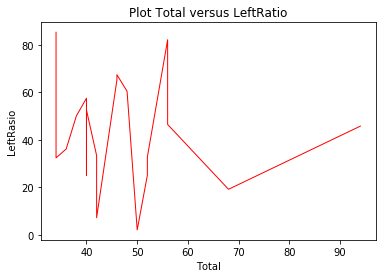

In [22]:
x = sdata[:,0]
y = sdata[:,1]
plt.plot(x,y,color='red', linewidth=1)
plt.title("Plot Total versus LeftRatio")
plt.xlabel("Total")
plt.ylabel("LeftRasio")